Setting up PySpark in Colab

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 46 kB/s 
     |████████████████████████████████| 199 kB 41.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=430262561bc15e5059d96abbbaa108a18d24fb2a73fe547447ed723566621a6a
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


Iniitialize spark session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
#dependencies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
from datetime  import datetime

#Loading the dataset

In [ ]:
df = spark.read.csv('/content/sample_data/SURGE/GS Sales Data.csv', header=True)


In [ ]:
df.show(100)

+------+--------------+----------+----------+---------+---------+--------------+-----------+------------------+-----------+--------------+----------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+--------------------+---------------+--------+--------+--------+
|Row ID|      Order ID|Order Date|Order_Week|Ship Date|Ship_Week|     Ship Mode|Customer ID|     Customer Name|    Segment|Country/Region|            City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|               Sales|       Quantity|Discount|  Profit|Returned|
+------+--------------+----------+----------+---------+---------+--------------+-----------+------------------+-----------+--------------+----------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+--------------------+---------------+--------+--

In [ ]:
df_sales = pd.read_csv("/content/sample_data/SURGE/GS Sales Data.csv",index_col=0)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_sales.head()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State/Province,Postal Code,Region,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
Row ID,,,,,,,,,,,,,,,,,,,,,,,,
1,US-2019-103800,1/3/2019,2019-1,1/7/2019,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,NaN
2,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,NaN
3,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,NaN,60540,Central,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,NaN
4,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,NaN
5,US-2019-141817,1/5/2019,2019-1,1/12/2019,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,NaN


In [ ]:
df_sales.shape


(10194, 24)

In [ ]:
df_sales.isnull().sum().sort_values(ascending=False)

Returned            9394
State/Province        28
Category              24
Customer Name         23
Regional Manager      17
Region                 0
Profit                 0
Discount               0
Quantity               0
Sales                  0
Product Name           0
Sub-Category           0
Product ID             0
Order ID               0
Order Date             0
City                   0
Country/Region         0
Segment                0
Customer ID            0
Ship Mode              0
Ship_Week              0
Ship Date              0
Order_Week             0
Postal Code            0
dtype: int64

convert column  on pandas DF to String due to some fields contain na values to avoid data type conversion errors in spark

In [ ]:
df_sales[['Returned','State/Province', 'Category' ,'Customer Name','Regional Manager']] = df_sales [['Returned','State/Province','Category','Customer Name','Regional Manager',]].astype(str)

 Create Spark Dataframe

In [ ]:
GS_Sales = spark.createDataFrame(df_sales)



# View  rows in spark dataframe 

In [ ]:
GS_Sales.show()

+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|      Order ID|Order Date|Order_Week|Ship Date|Ship_Week|     Ship Mode|Customer ID|   Customer Name|    Segment|Country/Region|        City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|  Sales|Quantity|Discount|  Profit|Returned|
+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|US-2019-103800|  1/3/2019|    2019-1| 1/7/2019|   2019-2|Standard Class|   DP-130

# View spark Data Frame Schema

In [ ]:
GS_Sales.printSchema()

root
 |-- Order ID: string (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Order_Week: string (nullable = true)
 |-- Ship Date: string (nullable = true)
 |-- Ship_Week: string (nullable = true)
 |-- Ship Mode: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country/Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State/Province: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Regional Manager: string (nullable = true)
 |-- Product ID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Product Name: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: double (nullable = true)
 |-- Returned: string (nullable = true)



#Transform Column Headings and Data Types in a New Spark Dataframe

 reffered to https://www.geeksforgeeks.org/how-to-change-column-type-in-pyspark-dataframe/
 

In [ ]:
GS_Salesdf = (GS_Sales.withColumn("order_Id", GS_Sales["Order ID"]).drop("Order ID")
              .withColumn("order_Date", GS_Sales["Order Date"].cast ('date')).drop("Order Date")
              .withColumn("order_weekNo", GS_Sales["Order_Week"]).drop("Order_Week")
              .withColumn("ship_date", GS_Sales["Ship Date"].cast('date')).drop("Ship Date")
              .withColumn("ship_weekNo", GS_Sales["Ship_Week"]).drop("Ship_Week")
              .withColumn("ship_mode", GS_Sales["Ship Mode"]).drop("Ship Mode")
              .withColumn("customer_Id", GS_Sales["Customer ID"]).drop("Customer ID")
              .withColumn("customer_name", GS_Sales["Customer Name"]).drop("Customer Name")
              .withColumn("customer_segment", GS_Sales["Segment"]).drop("Segment")
              .withColumn("country_region", GS_Sales["Country/Region"]).drop("Country/Region")
              .withColumn("customer_city", GS_Sales["City"]).drop("City")
              .withColumn("state_province", GS_Sales["State/Province"]).drop("State/Province")
              .withColumn("postal_code", GS_Sales["Postal Code"]).drop("Postal Code")
              .withColumn("customer_region", GS_Sales["Region"]).drop("Region")
              .withColumn("regional_manager", GS_Sales["Regional Manager"]).drop("Regional Manager")
              .withColumn("product_Id", GS_Sales["Product ID"]).drop("Product ID")
              .withColumn("product_category", GS_Sales["Category"]).drop("Category")
              .withColumn("sub_category", GS_Sales["Sub-Category"]).drop("Sub-Category")
              .withColumn("product_name", GS_Sales["Product Name"]).drop("Product Name")
              .withColumn("sales_revenue", GS_Sales["Sales"].cast('float')).drop("Sales")
              .withColumn("sales_quantity", GS_Sales["Quantity"].cast("float")).drop("Quantity")
              .withColumn("discount_amount", GS_Sales["Discount"].cast('float')).drop("Discount")
              .withColumn("sales_profit", GS_Sales["Profit"].cast('float')).drop("Profit")
              .drop("Returned")
              .distinct()
            ) 


In [ ]:
GS_Salesdf.show()

+--------------+----------+------------+---------+-----------+--------------+-----------+-----------------+----------------+--------------+-------------+--------------+-----------+---------------+-----------------+---------------+----------------+------------+--------------------+-------------+--------------+---------------+------------+
|      order_Id|order_Date|order_weekNo|ship_date|ship_weekNo|     ship_mode|customer_Id|    customer_name|customer_segment|country_region|customer_city|state_province|postal_code|customer_region| regional_manager|     product_Id|product_category|sub_category|        product_name|sales_revenue|sales_quantity|discount_amount|sales_profit|
+--------------+----------+------------+---------+-----------+--------------+-----------+-----------------+----------------+--------------+-------------+--------------+-----------+---------------+-----------------+---------------+----------------+------------+--------------------+-------------+--------------+----------

In [ ]:
GS_Salesdf.printSchema()

root
 |-- order_Id: string (nullable = true)
 |-- order_Date: date (nullable = true)
 |-- order_weekNo: string (nullable = true)
 |-- ship_date: date (nullable = true)
 |-- ship_weekNo: string (nullable = true)
 |-- ship_mode: string (nullable = true)
 |-- customer_Id: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- customer_segment: string (nullable = true)
 |-- country_region: string (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- state_province: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- customer_region: string (nullable = true)
 |-- regional_manager: string (nullable = true)
 |-- product_Id: string (nullable = true)
 |-- product_category: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- sales_revenue: float (nullable = true)
 |-- sales_quantity: float (nullable = true)
 |-- discount_amount: float (nullable = true)
 |-- sales_profit: float

Customer Table

In [ ]:
#Create spark SQL Select query to retrieve customer data as a DataFrame from customer table
GS_Salesdf.createOrReplaceTempView("sales")

DimCustomer_sqldf = spark.sql("SELECT customer_id,	customer_name FROM sales")
DimCustomer_sqldf.show()

+-----------+-----------------+
|customer_id|    customer_name|
+-----------+-----------------+
|   DK-12835|  Damala Kotsonis|
|   MP-17470|      Mark Packer|
|   VM-21685|  Valerie Mitchum|
|   TM-21010|   Tamara Manning|
|   CM-12445|      Chuck Magee|
|   NC-19470|       Neil Cohen|
|   EB-13705|       Ed Braxton|
|   BS-11365|     Bill Shonely|
|   RD-19720|      Roger Demir|
|   JP-15520|    Jeremy Pistek|
|   NC-19470|       Neil Cohen|
|   TW-21025|Tamara Willingham|
|   IL-15100|      Ivan Liston|
|   FW-14395|   Fred Wasserman|
|   CB-12535| Claudia Bergmann|
|   JO-15550|     Jesus Ocampo|
|   RK-19300|    Ralph Kennedy|
|   NS-18640|     Noel Staavos|
|   TN-21040|    Tanja Norvell|
|   EH-13765|     Edward Hooks|
+-----------+-----------------+
only showing top 20 rows



#Create a Table as a DataFrame from Transformed Data Frame, 

In [ ]:
DimCustomer_df=spark.sql("SELECT DISTINCT customer_Id as CustomerIDSurrogateKey,	customer_name as CustomerName,  postal_code as AddressKey FROM sales")

#print schema
DimCustomer_df.printSchema()



root
 |-- CustomerIDSurrogateKey: string (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- AddressKey: string (nullable = true)



In [ ]:
DimCustomer_df.show()

+----------------------+----------------+----------+
|CustomerIDSurrogateKey|    CustomerName|AddressKey|
+----------------------+----------------+----------+
|              JD-15895|Jonathan Doherty|     19140|
|              RB-19465|    Rick Bensley|     74133|
|              RR-19525|       Rick Reed|     01852|
|              ON-18715|   Odella Nelson|     85281|
|              SB-20290|    Sean Braxton|     77036|
|              KM-16660|    Khloe Miller|     95123|
|              KL-16555|   Kelly Lampkin|     80906|
|              GA-14725|   Guy Armstrong|     19120|
|              VW-21775| Victoria Wilson|     44256|
|              CS-12250| Chris Selesnick|     55125|
|              KB-16315|      Karl Braun|     11520|
|              SR-20740|   Steven Roelle|     10024|
|              GZ-14470|   Gary Zandusky|     87124|
|              AG-10900|   Arthur Gainer|     19134|
|              TS-21160|   Theresa Swint|     17403|
|              AA-10645|   Anna Andreadi|     

Address Table

In [ ]:
# Create a spark SQL select query to get customer address information from a temporary table view as a DataFrame.
GS_Salesdf.createOrReplaceTempView("sales")

DimAddress_sqldf = spark.sql("SELECT 	country_region, customer_city , state_province ,postal_code, customer_region , regional_manager  FROM sales")
DimAddress_sqldf.show()

+--------------+-------------+--------------+-----------+---------------+-----------------+
|country_region|customer_city|state_province|postal_code|customer_region| regional_manager|
+--------------+-------------+--------------+-----------+---------------+-----------------+
| United States|San Francisco|    California|      94122|           West|  Sadie Pawthorne|
| United States|  Brownsville|         Texas|      78521|        Central|Roxanne Rodriguez|
| United States|     Marietta|       Georgia|      30062|          South|      Fred Suzuki|
| United States|      Jackson|   Mississippi|      39212|          South|      Fred Suzuki|
| United States|San Francisco|    California|      94122|           West|  Sadie Pawthorne|
|        Canada|      Halifax|   Nova Scotia|        B3H|           East|      Chuck Magee|
| United States|San Francisco|    California|      94122|           West|  Sadie Pawthorne|
| United States|     Columbus|       Georgia|      31907|          South|      F

In [ ]:
# Create spark SQL query to create a Dim Table as a DataFrame from Transformed Data Frame

DimAddress_df=spark.sql("SELECT DISTINCT postal_code as AddressSk,	country_region as CountryRegion, customer_city as City,state_province as StateProvince,customer_region as Region,regional_manager as RegionalManager FROM sales")

DimAddress_df.printSchema()
 
DimAddress_df.show()

root
 |-- AddressSk: string (nullable = true)
 |-- CountryRegion: string (nullable = true)
 |-- City: string (nullable = true)
 |-- StateProvince: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- RegionalManager: string (nullable = true)

+---------+-------------+--------------+-------------+-------+-----------------+
|AddressSk|CountryRegion|          City|StateProvince| Region|  RegionalManager|
+---------+-------------+--------------+-------------+-------+-----------------+
|    33012|United States|       Hialeah|      Florida|  South|      Fred Suzuki|
|    33021|United States|     Hollywood|      Florida|  South|      Fred Suzuki|
|    61832|United States|      Danville|     Illinois|Central|Roxanne Rodriguez|
|    48205|United States|       Detroit|     Michigan|Central|Roxanne Rodriguez|
|    84062|United States|Pleasant Grove|         Utah|   West|  Sadie Pawthorne|
|    44256|United States|        Medina|         Ohio|   East|      Chuck Magee|
|    90640|Un

Product table

In [ ]:
# Create spark SQL Select query to retrieve product data as a DataFrame from a temporary table view
GS_Salesdf.createOrReplaceTempView("sales")

DimProduct_sqldf = spark.sql("SELECT 	product_Id,product_category,sub_category, product_name FROM sales")
DimProduct_sqldf.show()

+---------------+----------------+------------+--------------------+
|     product_Id|product_category|sub_category|        product_name|
+---------------+----------------+------------+--------------------+
|OFF-AR-10004272| Office Supplies|         Art|          Newell 308|
|OFF-EN-10002230| Office Supplies|   Envelopes|   Airmail Envelopes|
|TEC-PH-10004922|      Technology|      Phones|RCA Visys Integra...|
|TEC-AC-10002550|      Technology| Accessories|Maxell 4.7GB DVD-...|
|OFF-AR-10003752| Office Supplies|         Art|Deluxe Chalkboard...|
|OFF-PA-10000167| Office Supplies|       Paper|          Xerox 1925|
|FUR-TA-10003715|       Furniture|      Tables|Hon 2111 Invitati...|
|OFF-ST-10000991| Office Supplies|     Storage|Space Solutions H...|
|OFF-LA-10001569| Office Supplies|      Labels|           Avery 499|
|OFF-PA-10001509| Office Supplies|       Paper|Recycled Desk Sav...|
|FUR-FU-10001588|       Furniture| Furnishings|Deflect-o SuperTr...|
|OFF-BI-10003984| Office Supplies|

In [ ]:
# Create spark SQL query to create a Dim Table as a DataFrame from Transformed Data Frame

DimProduct_df=spark.sql("SELECT DISTINCT product_Id as ProductIDSk,product_category as ProductCategory,sub_category as ProductSubCategory,	product_name as ProductName  FROM sales")

DimProduct_df.printSchema()

DimProduct_df.show()

root
 |-- ProductIDSk: string (nullable = true)
 |-- ProductCategory: string (nullable = true)
 |-- ProductSubCategory: string (nullable = true)
 |-- ProductName: string (nullable = true)

+---------------+---------------+------------------+--------------------+
|    ProductIDSk|ProductCategory|ProductSubCategory|         ProductName|
+---------------+---------------+------------------+--------------------+
|TEC-PH-10001552|     Technology|            Phones|I Need's 3d Hello...|
|OFF-AR-10001953|Office Supplies|               Art|Boston 1645 Delux...|
|TEC-AC-10001767|     Technology|       Accessories|SanDisk Ultra 64 ...|
|OFF-PA-10001937|Office Supplies|             Paper|            Xerox 21|
|OFF-PA-10003039|Office Supplies|             Paper|          Xerox 1960|
|OFF-EN-10000483|Office Supplies|         Envelopes|White Envelopes, ...|
|FUR-BO-10004360|      Furniture|         Bookcases|Rush Hierlooms Co...|
|OFF-LA-10003388|Office Supplies|            Labels|             Avery 

 reffered to https://stackoverflow.com/questions/47150709/how-to-create-a-calendar-table-date-dimension-in-pandas

In [ ]:
def create_calender_date_table(start='2019-01-01', end='2050-12-31'):
   df = pd.DataFrame({"date": pd.date_range(start, end)})
   df["week_day"] = df.date.dt.weekday_name
   df["day"] = df.date.dt.day
   df["month"] = df.date.dt.month
   df["week"] = df.date.dt.weekofyear
   df["quarter"] = df.date.dt.quarter
   df["year"] = df.date.dt.year
   df.insert(0, 'date_Id', (df.year.astype(str) + df.month.astype(str).str.zfill(2) + df.day.astype(str).str.zfill(2)).astype(int))
   return df

Fact order sales table

In [ ]:
# Create spark SQL query to create a Fact Table as a DataFrame from Transformed Data Frame

FactOrders_df=spark.sql("SELECT DISTINCT order_id as OrderID,	order_date as OrderDate,  ship_date as ShipDate, ship_weekNo as ShipWeek, ship_mode as ShipMode, customer_Id as CustomerIDKey, product_Id as ProductIDKey, sales_revenue as Sales, sales_quantity as Quantity, discount_amount as Discount, sales_profit as Profit FROM sales")


FactOrders_df.printSchema()


FactOrders_df.show()

root
 |-- OrderID: string (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- ShipDate: date (nullable = true)
 |-- ShipWeek: string (nullable = true)
 |-- ShipMode: string (nullable = true)
 |-- CustomerIDKey: string (nullable = true)
 |-- ProductIDKey: string (nullable = true)
 |-- Sales: float (nullable = true)
 |-- Quantity: float (nullable = true)
 |-- Discount: float (nullable = true)
 |-- Profit: float (nullable = true)

+--------------+---------+--------+--------+--------------+-------------+---------------+-------+--------+--------+--------+
|       OrderID|OrderDate|ShipDate|ShipWeek|      ShipMode|CustomerIDKey|   ProductIDKey|  Sales|Quantity|Discount|  Profit|
+--------------+---------+--------+--------+--------------+-------------+---------------+-------+--------+--------+--------+
|US-2019-156587|     null|    null| 2019-10|   First Class|     AB-10015|FUR-CH-10004477| 48.712|     1.0|     0.2|  5.4801|
|US-2019-114790|     null|    null| 2019-11|  Second Class

In [ ]:
df_sales.head()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State/Province,Postal Code,Region,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
Row ID,,,,,,,,,,,,,,,,,,,,,,,,
1,US-2019-103800,1/3/2019,2019-1,1/7/2019,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,nan
2,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,nan
3,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,nan,60540,Central,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,nan
4,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,nan
5,US-2019-141817,1/5/2019,2019-1,1/12/2019,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,nan


#check for null values in the 

In [ ]:
df_sales.isnull().sum()

Order ID            0
Order Date          0
Order_Week          0
Ship Date           0
Ship_Week           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country/Region      0
City                0
State/Province      0
Postal Code         0
Region              0
Regional Manager    0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Returned            0
dtype: int64

In [ ]:
df=df_sales

drop rerurned column

In [ ]:
df2= df.drop('Returned' , axis= 1)

##fill null values

In [ ]:
df3 = df2.fillna(method = 'pad')
df3

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State/Province,Postal Code,Region,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,,,,
1,US-2019-103800,1/3/2019,2019-1,1/7/2019,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
3,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,nan,60540,Central,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
4,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
5,US-2019-141817,1/5/2019,2019-1,1/12/2019,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10190,US-2022-143259,12/30/2022,2022-53,1/3/2023,2023-1,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,Chuck Magee,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
10191,US-2022-115427,12/30/2022,2022-53,1/3/2023,2023-1,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,Sadie Pawthorne,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
10192,US-2022-156720,12/30/2022,2022-53,1/3/2023,2023-1,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,Sadie Pawthorne,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048


#check for null values in the new dataframe

In [ ]:
df3.isnull().sum().sum()

0

In [ ]:
df3.head()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State/Province,Postal Code,Region,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,,,,
1,US-2019-103800,1/3/2019,2019-1,1/7/2019,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
3,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,nan,60540,Central,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
4,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
5,US-2019-141817,1/5/2019,2019-1,1/12/2019,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


## check  the types of the column labels

In [ ]:
all(isinstance(column, str) for column in df3.columns)

True

In [ ]:
df3.columns = list(map(str, df3.columns))

# column labels types 
all(isinstance(column, str) for column in df3.columns)

True

due  to  time constraints  coudnt do the other data viusalization and the other  requirements 

continue..

In [ ]:
df3.set_index('City', inplace=True)


df3.head()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,State/Province,Postal Code,Region,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
City,,,,,,,,,,,,,,,,,,,,,,
Houston,US-2019-103800,1/3/2019,2019-1,1/7/2019,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,Texas,77095,Central,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
Naperville,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Illinois,60540,Central,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
Naperville,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,nan,60540,Central,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
Naperville,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Illinois,60540,Central,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
Philadelphia,US-2019-141817,1/5/2019,2019-1,1/12/2019,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,Pennsylvania,19143,East,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [ ]:
df3['Profit'] = df3.sum(axis=1)

# view the first five elements 
df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,State/Province,Postal Code,Region,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
City,,,,,,,,,,,,,,,,,,,,,,
Houston,US-2019-103800,1/3/2019,2019-1,1/7/2019,2019-2,Standard Class,DP-13000,Darren Powers,Consumer,United States,Texas,77095,Central,Roxanne Rodriguez,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,24.1992
Naperville,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Illinois,60540,Central,Roxanne Rodriguez,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,0.8530
Naperville,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,nan,60540,Central,Roxanne Rodriguez,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,19.2557
Naperville,US-2019-112326,1/4/2019,2019-1,1/8/2019,2019-2,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Illinois,60540,Central,Roxanne Rodriguez,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,211.1612
Philadelphia,US-2019-141817,1/5/2019,2019-1,1/12/2019,2019-2,Standard Class,MB-18085,Mick Brown,Consumer,United States,Pennsylvania,19143,East,Chuck Magee,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,27.6200


In [ ]:
print('data dimensions:', df3.shape)

data dimensions: (10194, 22)


In [ ]:
years = list(map(str, range(2019, 2050)))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78533be150>]],
      dtype=object)

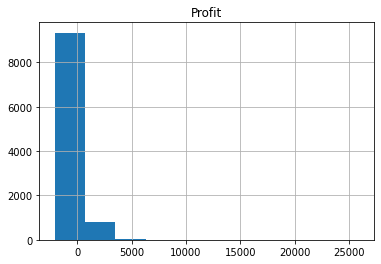

In [ ]:
df3.hist('Profit')

In [ ]:
df3.sort_values(['City'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df3.head()

# transpose the dataframe
df_top5 = df3['Profit'].transpose()

df_top5.head()

City
Yuma       241.4291
Yuma        15.6712
Yuma        15.8768
Yuma       125.6970
Yucaipa     69.0080
Name: Profit, dtype: float64

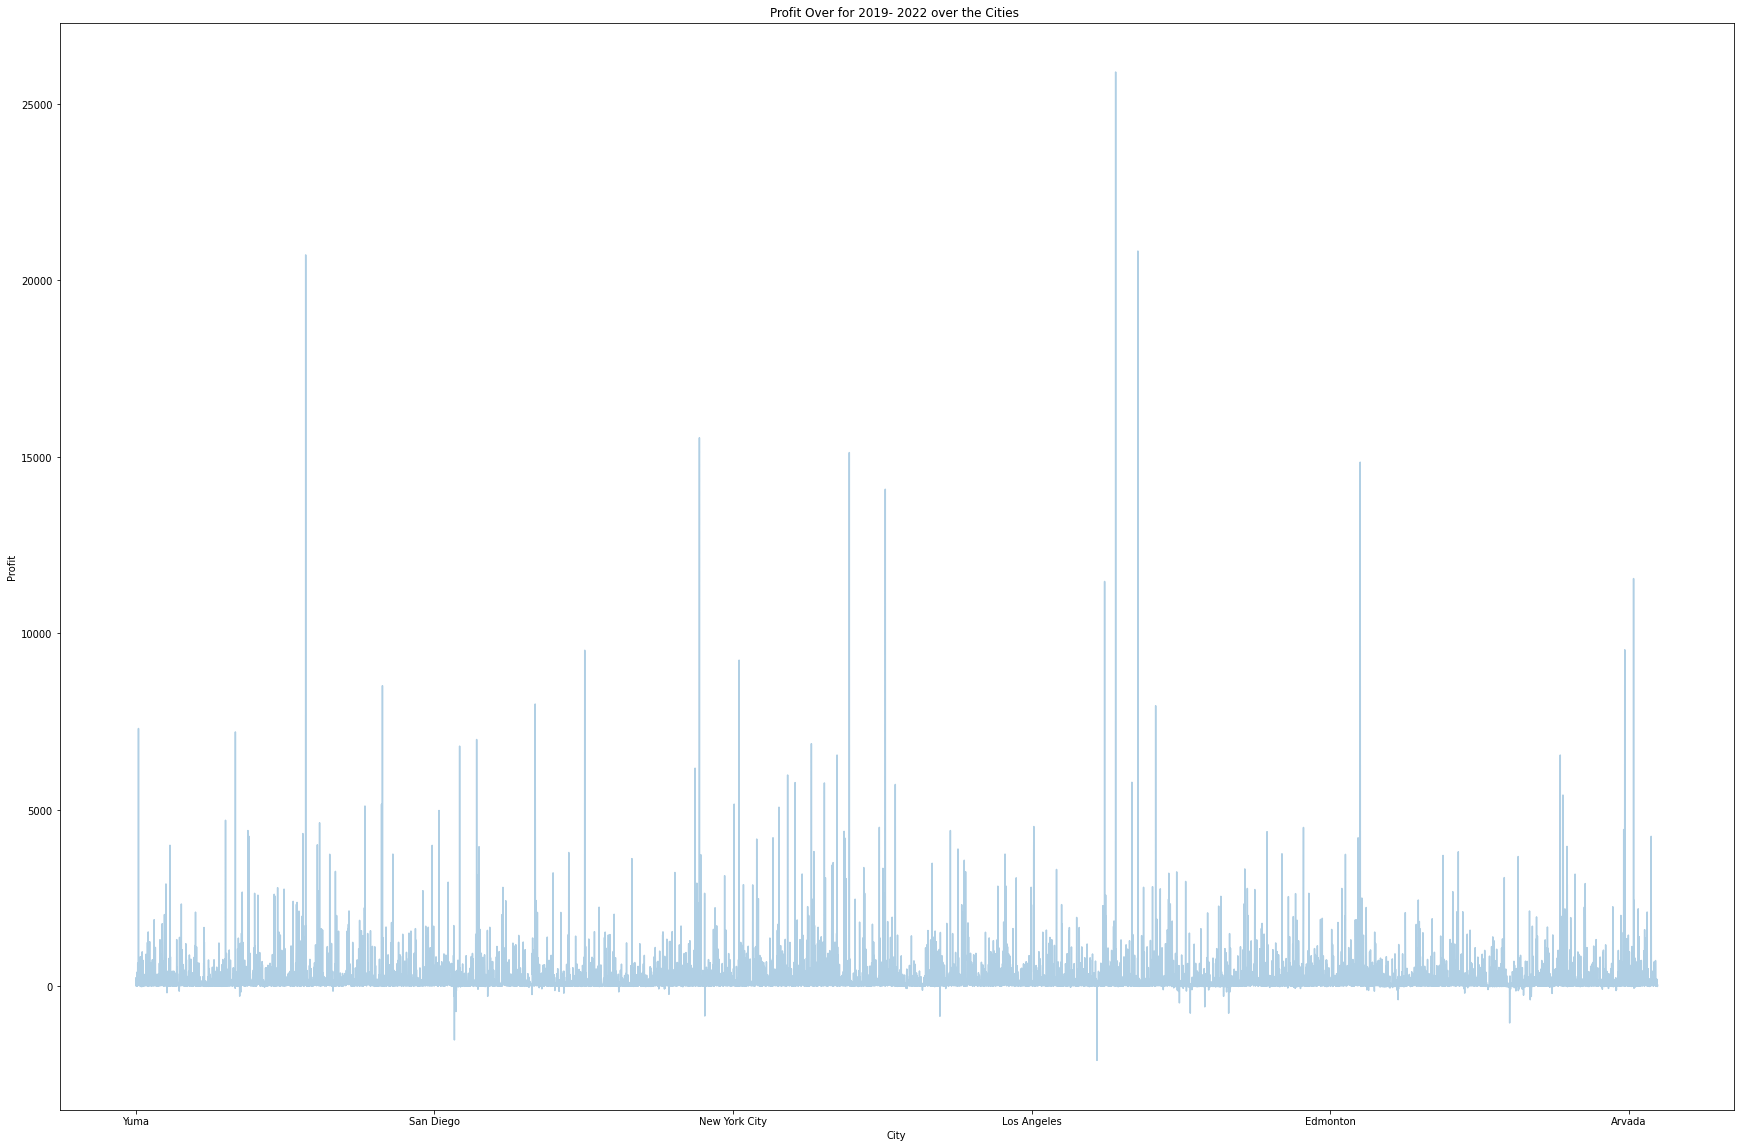

In [ ]:
df_top5.plot(kind='line', 
             alpha=0.35,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(30, 20))

plt.title('Profit Over for 2019- 2022 over the Cities ')
plt.ylabel('Profit')
plt.xlabel('City')

plt.show()


In [ ]:
df3['State/Province'].head()

City
Yuma          Arizona
Yuma          Arizona
Yuma          Arizona
Yuma          Arizona
Yucaipa    California
Name: State/Province, dtype: object

In [ ]:
df3.set_index('Region', inplace=True)

df3.head()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,State/Province,Postal Code,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Region,,,,,,,,,,,,,,,,,,,,,
West,US-2021-108224,5/14/2021,2021-20,5/14/2021,2021-20,Same Day,TH-21235,Tiffany House,Corporate,United States,Arizona,85364,Sadie Pawthorne,TEC-AC-10003832,Technology,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,185.528,7,0.2,241.4291
West,US-2021-134222,7/10/2021,2021-28,7/11/2021,2021-29,Same Day,NZ-18565,Nick Zandusky,Home Office,United States,Arizona,85364,Sadie Pawthorne,OFF-BI-10001658,Office Supplies,Binders,GBC Standard Therm-A-Bind Covers,44.856,6,0.7,15.6712
West,US-2021-106621,9/29/2021,2021-40,10/1/2021,2021-40,Second Class,DM-12955,Dario Medina,Corporate,United States,Arizona,85364,Sadie Pawthorne,OFF-AR-10002375,Office Supplies,Art,Newell 351,10.496,4,0.2,15.8768
West,US-2022-159282,10/16/2022,2022-43,10/21/2022,2022-43,Standard Class,GH-14410,Gary Hansen,Home Office,United States,Arizona,85364,Sadie Pawthorne,TEC-MA-10001148,Technology,Machines,Swingline SM12-08 MicroCut Jam Free Shredder,599.985,5,0.7,125.6970
West,US-2020-112014,8/13/2020,2020-33,8/20/2020,2020-34,Standard Class,ON-18715,Odella Nelson,Corporate,United States,California,92399,Sadie Pawthorne,OFF-AR-10003156,Office Supplies,Art,50 Colored Long Pencils,50.800,5,0.0,69.0080


In [ ]:
df3['Profit'] = df3.sum(axis=1)

df3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,State/Province,Postal Code,Regional Manager,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Region,,,,,,,,,,,,,,,,,,,,,
West,US-2021-108224,5/14/2021,2021-20,5/14/2021,2021-20,Same Day,TH-21235,Tiffany House,Corporate,United States,Arizona,85364,Sadie Pawthorne,TEC-AC-10003832,Technology,Accessories,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,185.528,7,0.2,434.1571
West,US-2021-134222,7/10/2021,2021-28,7/11/2021,2021-29,Same Day,NZ-18565,Nick Zandusky,Home Office,United States,Arizona,85364,Sadie Pawthorne,OFF-BI-10001658,Office Supplies,Binders,GBC Standard Therm-A-Bind Covers,44.856,6,0.7,67.2272
West,US-2021-106621,9/29/2021,2021-40,10/1/2021,2021-40,Second Class,DM-12955,Dario Medina,Corporate,United States,Arizona,85364,Sadie Pawthorne,OFF-AR-10002375,Office Supplies,Art,Newell 351,10.496,4,0.2,30.5728
West,US-2022-159282,10/16/2022,2022-43,10/21/2022,2022-43,Standard Class,GH-14410,Gary Hansen,Home Office,United States,Arizona,85364,Sadie Pawthorne,TEC-MA-10001148,Technology,Machines,Swingline SM12-08 MicroCut Jam Free Shredder,599.985,5,0.7,731.3820
West,US-2020-112014,8/13/2020,2020-33,8/20/2020,2020-34,Standard Class,ON-18715,Odella Nelson,Corporate,United States,California,92399,Sadie Pawthorne,OFF-AR-10003156,Office Supplies,Art,50 Colored Long Pencils,50.800,5,0.0,124.8080


In [ ]:
print('data dimensions:', df3.shape)

data dimensions: (10194, 21)


In [ ]:
df3.sort_values(['Region'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df3.head()

# transpose the dataframe
df_top5 = df3['Profit'].transpose()

df_top5.head()

Region
West     434.1571
West     145.6106
West     648.6760
West     280.6250
West    1191.5360
Name: Profit, dtype: float64

In [ ]:
df3.set_index('Category', inplace=True)

In [ ]:
df3['Sales'] = df3.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df3_Categories = df3.groupby('Category', axis=0).count()
print(type(df3.groupby('Category', axis=0)))

df3_Categories.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,State/Province,Postal Code,Regional Manager,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Category,,,,,,,,,,,,,,,,,,,,
Furniture,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195,2195
Office Supplies,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114,6114
Technology,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861,1861
nan,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24


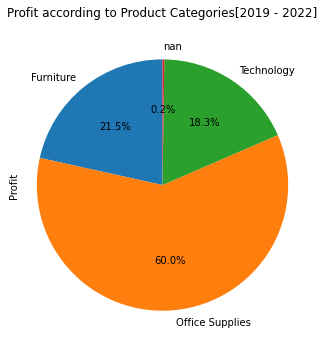

In [ ]:
df3_Categories['Profit'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                                  # add shadow      
                            )

plt.title('Profit according to Product Categories[2019 - 2022]')
plt.axis('equal') 
plt.show()


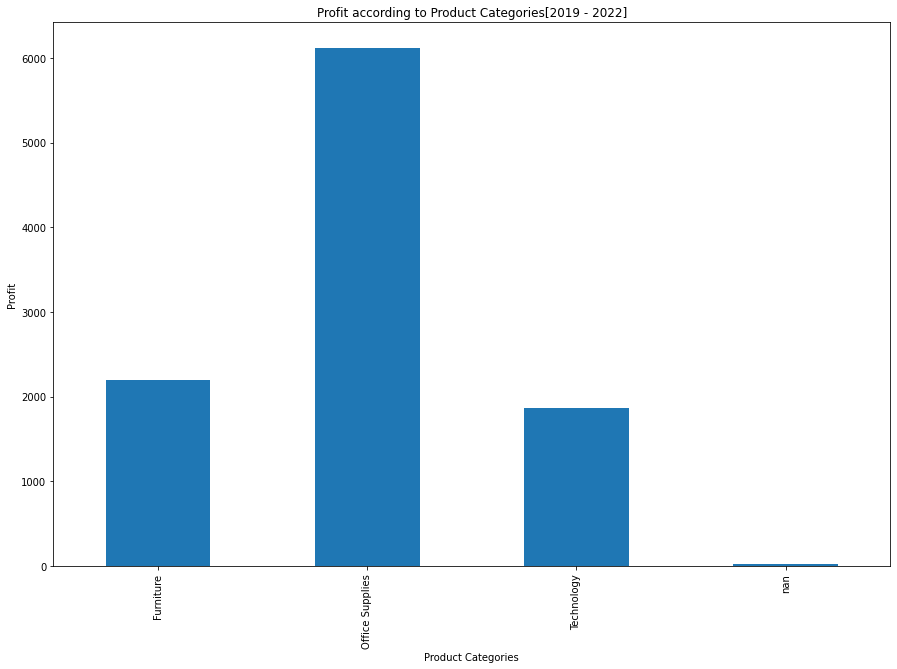

In [ ]:
df3_Categories['Profit'].plot(kind='bar', figsize=(15, 10))

plt.xlabel('Product Categories') # add to x-label to the plot
plt.ylabel('Profit') # add y-label to the plot
plt.title('Profit according to Product Categories[2019 - 2022]') # add title to the plot

plt.show()

In [ ]:
df3_sales = df3.groupby(['Category'], axis=0).sum()
#print(type(df3.groupby('Category', axis=0)))

df3_sales.head()

,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,2.301612e+06,8354,380.29,1.540819e+06
Office Supplies,2.388401e+06,23204,956.30,1.634082e+06
Technology,2.671323e+06,7008,244.60,1.829582e+06
nan,3.127790e+04,88,2.80,2.135804e+04


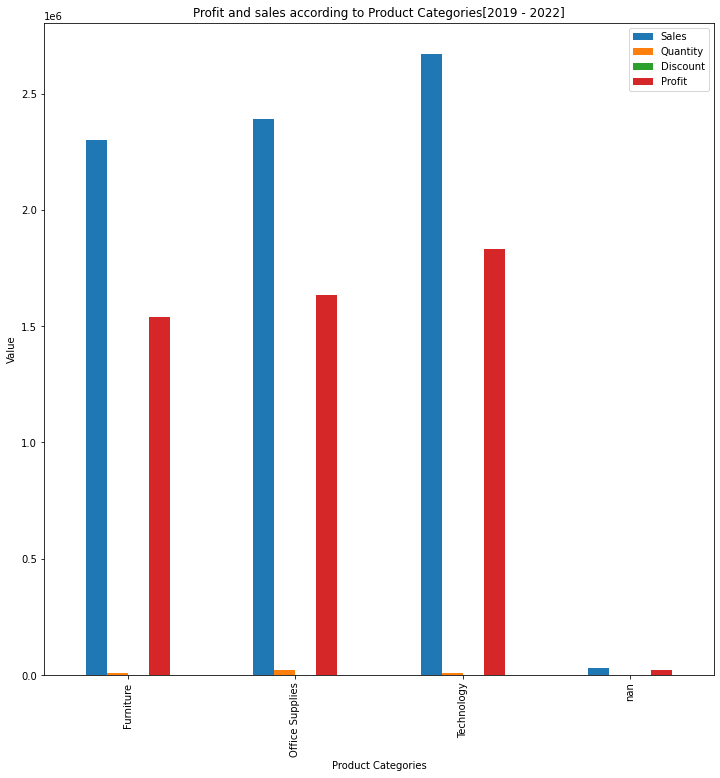

In [ ]:
#df3_sales['Profit'].plot(kind='line', figsize=(12, 12), color='steelblue')
#df3_sales.index = df3_sales.index.map(int) 
df3_sales.plot(kind='bar',figsize=(12, 12))

plt.xlabel('Product Categories') # add to x-label to the plot
plt.ylabel('Value') # add y-label to the plot
plt.title('Profit and sales according to Product Categories[2019 - 2022]') # add title to the plot

plt.show()

In [ ]:
df_target = pd.read_csv("/content/sample_data/SURGE/Daily Target.csv", index_col = 0)

In [ ]:
df_target.tail()

,Order Date,Segment,Sales Target
Category,,,
Furniture,12/30/2022,Consumer,284
Office Supplies,12/30/2022,Consumer,61
Office Supplies,12/30/2022,Corporate,29
Office Supplies,12/30/2022,Home Office,199
Technology,12/30/2022,Consumer,80


In [ ]:
df3. tail  ()

,Order ID,Order Date,Order_Week,Ship Date,Ship_Week,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,State/Province,Postal Code,Regional Manager,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Category,,,,,,,,,,,,,,,,,,,,
Office Supplies,US-2022-157483,11/11/2022,2022-46,11/18/2022,2022-47,Standard Class,EP-13915,Emily Phan,Consumer,United States,Michigan,48227,Roxanne Rodriguez,OFF-AR-10004260,Art,Boston 1799 Powerhouse Electric Pencil Sharpener,617.5008,7,0.0,428.6408
Office Supplies,US-2020-111948,11/11/2020,2020-46,11/11/2020,2020-46,Same Day,AG-10495,Andrew Gjertsen,Corporate,United States,Michigan,48234,Roxanne Rodriguez,OFF-ST-10003282,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",1393.0896,7,0.0,967.7696
Furniture,US-2020-124499,10/9/2020,2020-41,10/13/2020,2020-42,Standard Class,FM-14380,Fred McMath,Consumer,United States,Michigan,48227,Roxanne Rodriguez,FUR-CH-10000513,Chairs,High-Back Leather Manager's Chair,1214.0073,3,0.0,821.0373
Furniture,US-2020-138121,12/17/2020,2020-51,12/17/2020,2020-51,Same Day,JL-15835,John Lee,Consumer,United States,Michigan,48205,Roxanne Rodriguez,FUR-CH-10004875,Chairs,Harbour Creations 67200 Series Stacking Chairs,471.5172,2,0.0,327.1572
Office Supplies,US-2022-167976,11/11/2022,2022-46,11/14/2022,2022-47,Second Class,JL-15505,Jeremy Lonsdale,Consumer,United States,South Dakota,57401,Roxanne Rodriguez,OFF-SU-10004661,Supplies,Acme Titanium Bonded Scissors,92.1300,3,0.0,63.6300


In [ ]:
df_target[['Segment','Sales Target']] = df_target[[ 'Segment','Sales Target']].astype(str)

In [ ]:
# Create Spark Dataframe
Daily_Target = spark.createDataFrame(df_target)

In [ ]:
# View first 20 rows in spark dataframe 
Daily_Target.show()

+----------+-----------+------------+
|Order Date|    Segment|Sales Target|
+----------+-----------+------------+
|  1/3/2019|   Consumer|          15|
|  1/4/2019|Home Office|         300|
|  1/5/2019|   Consumer|          21|
|  1/6/2019|Home Office|        2316|
|  1/6/2019|   Consumer|          17|
|  1/6/2019|  Corporate|          14|
|  1/6/2019|Home Office|         699|
|  1/6/2019|Home Office|        1068|
|  1/7/2019|   Consumer|          81|
|  1/7/2019|   Consumer|          11|
|  1/9/2019|   Consumer|           9|
|  1/9/2019|   Consumer|          29|
| 1/10/2019|  Corporate|          47|
| 1/10/2019|  Corporate|           3|
| 1/11/2019|   Consumer|           9|
| 1/13/2019|   Consumer|         792|
| 1/13/2019|   Consumer|        1387|
| 1/13/2019|  Corporate|         570|
| 1/13/2019|  Corporate|         595|
| 1/14/2019|  Corporate|          66|
+----------+-----------+------------+
only showing top 20 rows



In [ ]:
# View spark Data Frame Schema
Daily_Target.printSchema()

root
 |-- Order Date: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Sales Target: string (nullable = true)



In [ ]:
# Create New Spark Dataframe and Transform Column Headings and Data Types

Daily_Target_finalDF = (Daily_Target.withColumn("order_date", to_date(col("Order Date"), "yyyy/mm/dd")).drop("Order Date")
                        .withColumn("customer_segment", Daily_Target["Segment"]).drop("Segment")
                        .withColumn("sales_target",Daily_Target["Sales Target"].cast('float')).drop("Sales Target")
                        
                        .distinct()
            ) 

Daily_Target_finalDF.show(20)

+----------+----------------+------------+
|order_date|customer_segment|sales_target|
+----------+----------------+------------+
|      null|        Consumer|        47.0|
|      null|        Consumer|       800.0|
|      null|     Home Office|        61.0|
|      null|       Corporate|        34.0|
|      null|        Consumer|       289.0|
|      null|       Corporate|      1260.0|
|      null|        Consumer|       449.0|
|      null|        Consumer|      9625.0|
|      null|     Home Office|       495.0|
|      null|       Corporate|      2468.0|
|      null|     Home Office|       392.0|
|      null|        Consumer|      2172.0|
|      null|     Home Office|      2805.0|
|      null|        Consumer|       437.0|
|      null|       Corporate|       149.0|
|      null|        Consumer|      1120.0|
|      null|        Consumer|        42.0|
|      null|        Consumer|      1177.0|
|      null|        Consumer|       104.0|
|      null|        Consumer|       933.0|
+----------

In [ ]:
# Create spark SQL Select query to retrieve customer data as a DataFrame from a temporary table view
Daily_Target_finalDF.createOrReplaceTempView("daily_target")

In [ ]:
NewTable_sqlDF = spark.sql("SELECT order_date,	customer_segment,sales_target FROM daily_target")
NewTable_sqlDF.show()
pandasDF1 = NewTable_sqlDF.toPandas()

+----------+----------------+------------+
|order_date|customer_segment|sales_target|
+----------+----------------+------------+
|      null|        Consumer|        47.0|
|      null|        Consumer|       800.0|
|      null|     Home Office|        61.0|
|      null|       Corporate|        34.0|
|      null|        Consumer|       289.0|
|      null|       Corporate|      1260.0|
|      null|        Consumer|       449.0|
|      null|        Consumer|      9625.0|
|      null|     Home Office|       495.0|
|      null|       Corporate|      2468.0|
|      null|     Home Office|       392.0|
|      null|        Consumer|      2172.0|
|      null|     Home Office|      2805.0|
|      null|        Consumer|       437.0|
|      null|       Corporate|       149.0|
|      null|        Consumer|      1120.0|
|      null|        Consumer|        42.0|
|      null|        Consumer|      1177.0|
|      null|        Consumer|       104.0|
|      null|        Consumer|       933.0|
+----------

In [ ]:
# Create spark SQL Select query to retrieve quantity data as a DataFrame from a temporary table view
GS_Salesdf.createOrReplaceTempView("sales")

NewTable2_sqlDF = spark.sql("SELECT order_date,order_week_no,sales_quantity FROM sales")
NewTable2_sqlDF.show()
pandasDF2 = NewTable2_sqlDF.toPandas()

AnalysisException: ignored